# Diabetes Prediction

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Load the dataset
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame=True)

In [49]:
print(df['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [50]:
# split the data into features and target
df = df['frame']

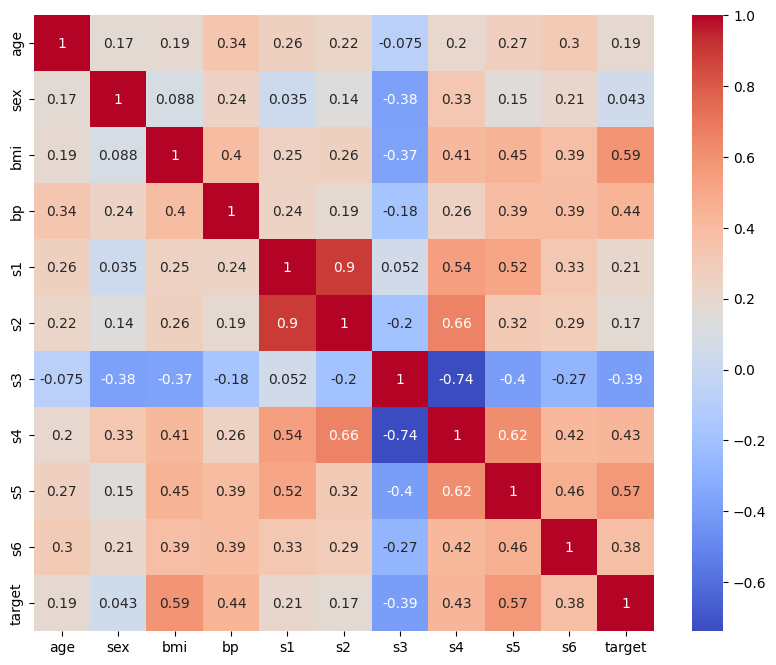

In [51]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
# split the data into features and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [54]:
# Parametr tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [2, 3, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [55]:
gride_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='r2')

In [56]:
gride_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


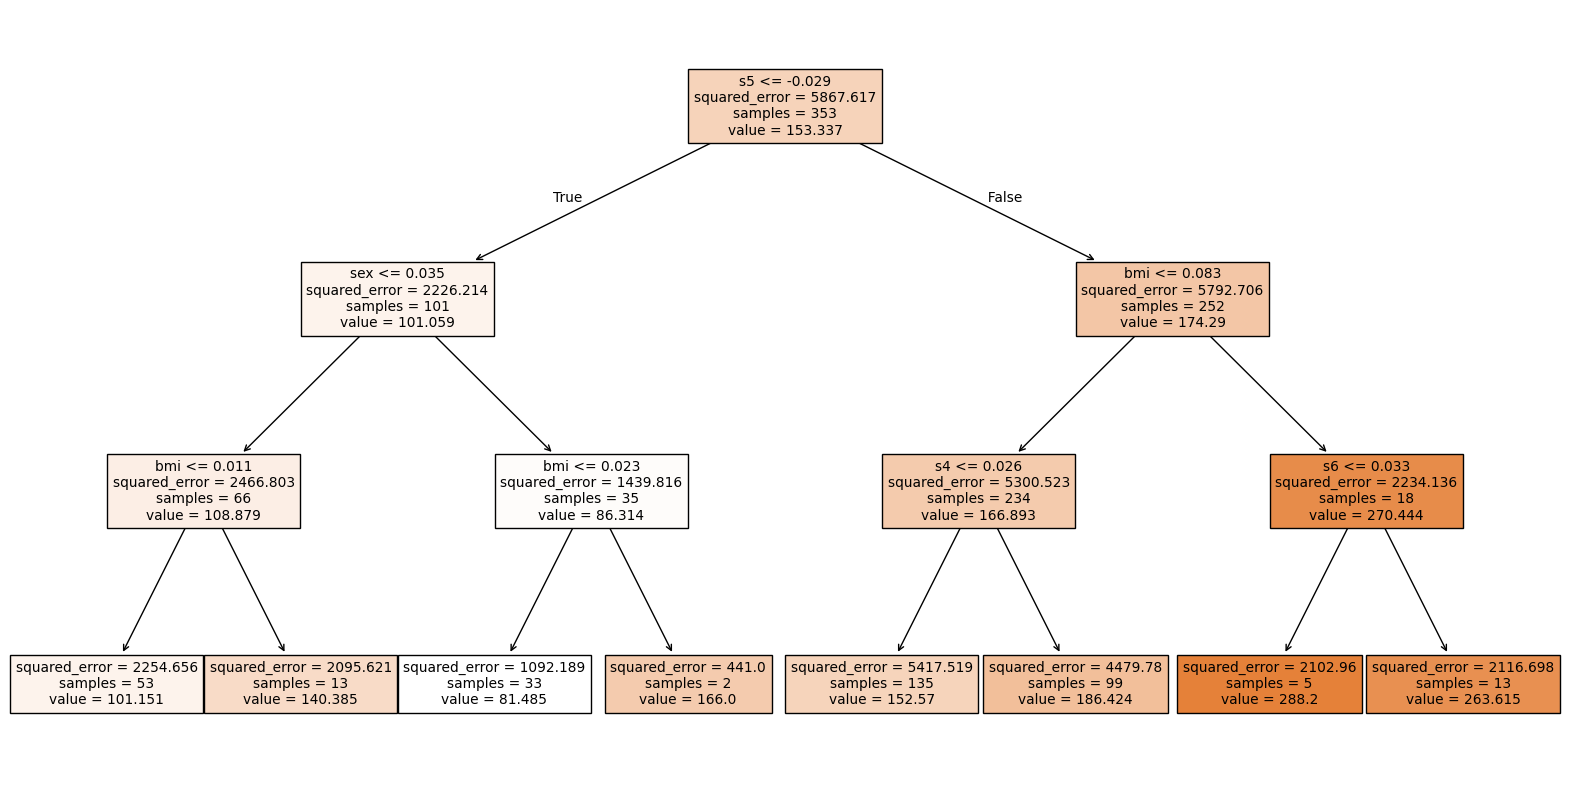

In [57]:
from sklearn.tree import plot_tree
best_tree = gride_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.show()

In [58]:
# Accuracy
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3599.7351883495485
R^2 Score: 0.4145172837884129


In [59]:
gride_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}